## Data Analytics - Lab 1 - Random data visualisation and sampling

### Task 1

Done.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

### Task 2

In [24]:
uniform = np.random.uniform(0, 1, size=(1000,))
normal_sigma_1 = np.random.normal(loc=0, scale=1, size=(1000,))
normal_sigma_10 = np.random.normal(loc=0, scale=10, size=(1000,))
ab_pairs = [(1, 1), (2, 2), (3, 9)]
betas = [np.random.beta(a=p[0], b=p[1], size=(1000,)) for p in ab_pairs]
multivariate_1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]], size=(10000,))
multivariate_2 = np.random.multivariate_normal(mean=[0, 0], cov=[[2, 1], [1, 2]], size=(10000,))

### Task 3

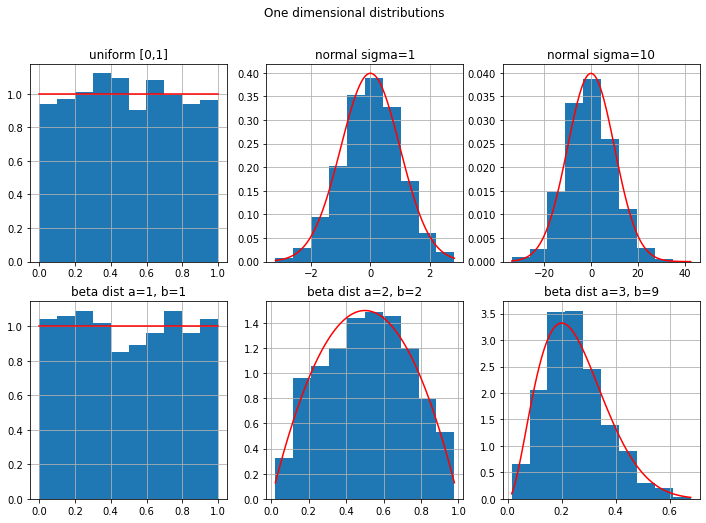

In [25]:
import scipy.stats as stats
dists = [uniform, normal_sigma_1, normal_sigma_10, *betas]
names = ['uniform [0,1]', 'normal sigma=1', 'normal sigma=10'] + [f'beta dist a={a}, b={b}' for a, b in ab_pairs]
analytical = [(stats.uniform, (0, 1)),(stats.norm, (0, 1)), (stats.norm, (0, 10)), (stats.beta, (1, 1)), (stats.beta, (2, 2)), (stats.beta, (3, 9))]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
for i, (name, analytical, dist) in enumerate(zip(names, analytical, dists)):
    func, params = analytical
    x = np.linspace(np.min(dist), np.max(dist), 100)
    axes[i].plot(x, func.pdf(x, *params), 'r')
    axes[i].hist(dist, density=True)
    axes[i].set_title(name)
    axes[i].grid()
fig.suptitle("One dimensional distributions")
plt.show()

### Task 4

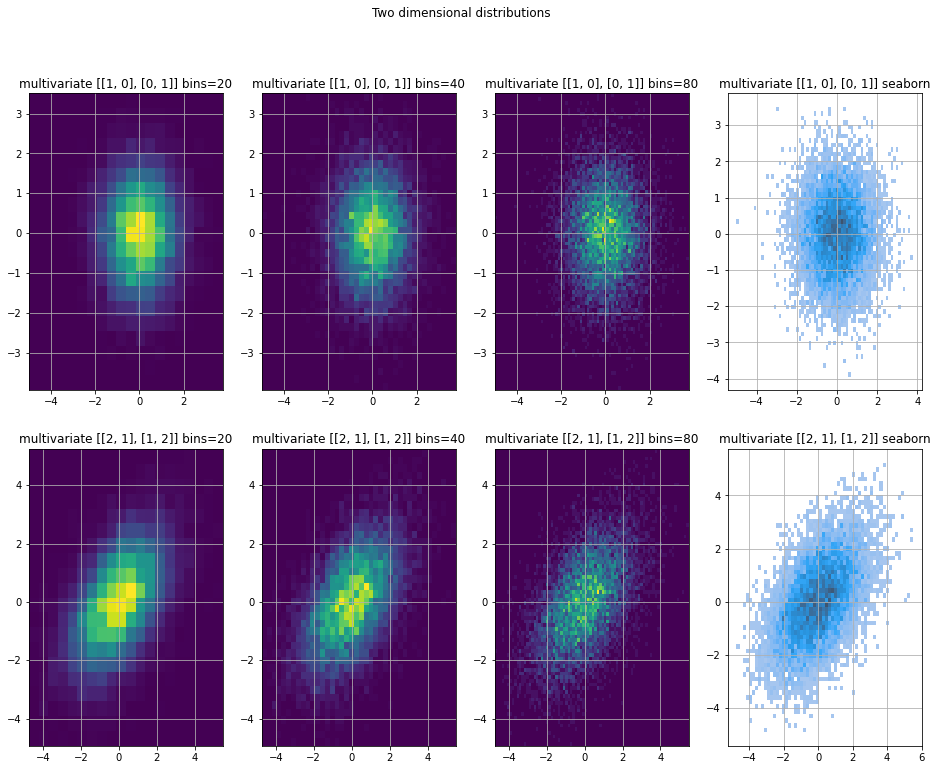

In [26]:
import seaborn as sns
dists_2D = [multivariate_1] * 4 + [multivariate_2] * 4
names = ['multivariate [[1, 0], [0, 1]]'] * 4 + ['multivariate [[2, 1], [1, 2]]'] * 4
params = [20, 40, 80, "seaborn"] * 2 # phyton
fig, axes = plt.subplots(2, 4, figsize=(16, 12))
axes = axes.flatten()
for i, (name, param, dist) in enumerate(zip(names, params, dists_2D)):
    if i % 4 == 3:
        sns.histplot(x=dist[:, 0], y=dist[:, 1], ax=axes[i])
        name += f" {param}"
    else:
        axes[i].hist2d(dist[:, 0], dist[:, 1], density=True, bins=param)
        name += f" bins={param}"
    axes[i].set_title(name)
    axes[i].grid()
fig.suptitle("Two dimensional distributions")
plt.show()

### Tasks 5-6 done literally

In [27]:
import random
random.seed(0)
ys = []
xs = []
alphas = []
betas = []
for _ in range(1000):
    alpha = random.gauss(2, 0.1)
    beta = random.gauss(0.2, 0.2)
    x = random.gauss(0, 3)
    sigma = abs(random.gauss(0, 1))
    u = beta*x + alpha
    xs.append(x)
    alphas.append(alpha)
    betas.append(beta)
    ys.append(random.gauss(u, sigma))
len(ys)

1000

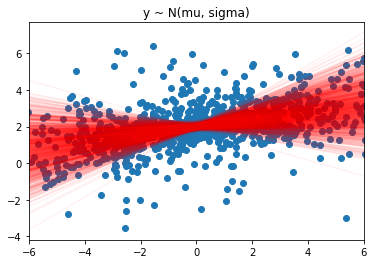

In [28]:
plt.scatter(xs, ys)
for a, b in zip(alphas, betas):
    x = np.linspace(-6, 6, 100)
    y = b * x + a
    plt.plot(x, y, 'r', alpha=0.05)
plt.xlim([-6, 6])
plt.title('y ~ N(mu, sigma)')
plt.show()

### Tasks 5-6 but vectorized

In [29]:
np.random.seed(0)
alphas = np.random.normal(2, 0.1, size=(1000,))
betas = np.random.normal(0.2, 0.2, size=(1000,))
xs = np.random.normal(0, 3, size=(1000,))
sigmas = np.abs(np.random.normal(0, 1, size=(1000,)))
us = betas * xs + alphas
ys = np.random.normal(us, sigmas, size=(1000,))
ys.shape

(1000,)

(100, 1000)


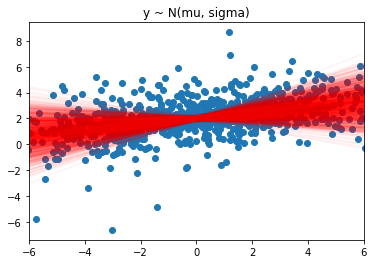

In [30]:
plt.scatter(xs, ys)
domain = np.linspace(-6, 6, 100).reshape((100, 1))
y = domain * betas + alphas
print(y.shape)
extended_domain = np.ones((1, 1000)) * domain
plt.plot(extended_domain, y,  'r', alpha=0.05)
plt.xlim([-6, 6])
plt.title('y ~ N(mu, sigma)')
plt.show()